<a href="https://colab.research.google.com/github/JoeConrad11/CollegeData12/blob/main/DTSC1302.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
url = "https://raw.githubusercontent.com/JoeConrad11/CollegeData12/refs/heads/main/College_Data%20(1).csv"
df = pd.read_csv(url)
df.head(7)

Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   
5             Albertson College     Yes   587     479     158         38   
6       Albertus Magnus College     Yes   353     340     103         17   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   
5         62          678           41     13500        3335    500       675   
6         45          416          230     13290        5720    500      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54  
3   92        97        7.7           37   19016         59  
4   76        72       11.9            2   10922         15  
5   67        73        9.4           11    9727         55  
6   90        93       11.5           26    8861         63

In [2]:

!git clone https://github.com/JoeConrad11/CollegeData12
# Change directory to the cloned repository
%cd CollegeData12
# Updated path to include subdirectory
df = pd.read_csv("College_Data (1).csv") # Fixed the filename here, removing incorrect '12'
df.head(5)

Cloning into 'CollegeData12'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 27 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 14.77 MiB | 10.13 MiB/s, done.
Resolving deltas: 100% (4/4), done.
/content/CollegeData12


Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54  
3   92        97        7.7           37   19016         59  
4   76        72       11.9            2   10922         15

#Correlation Heatmap for all the data

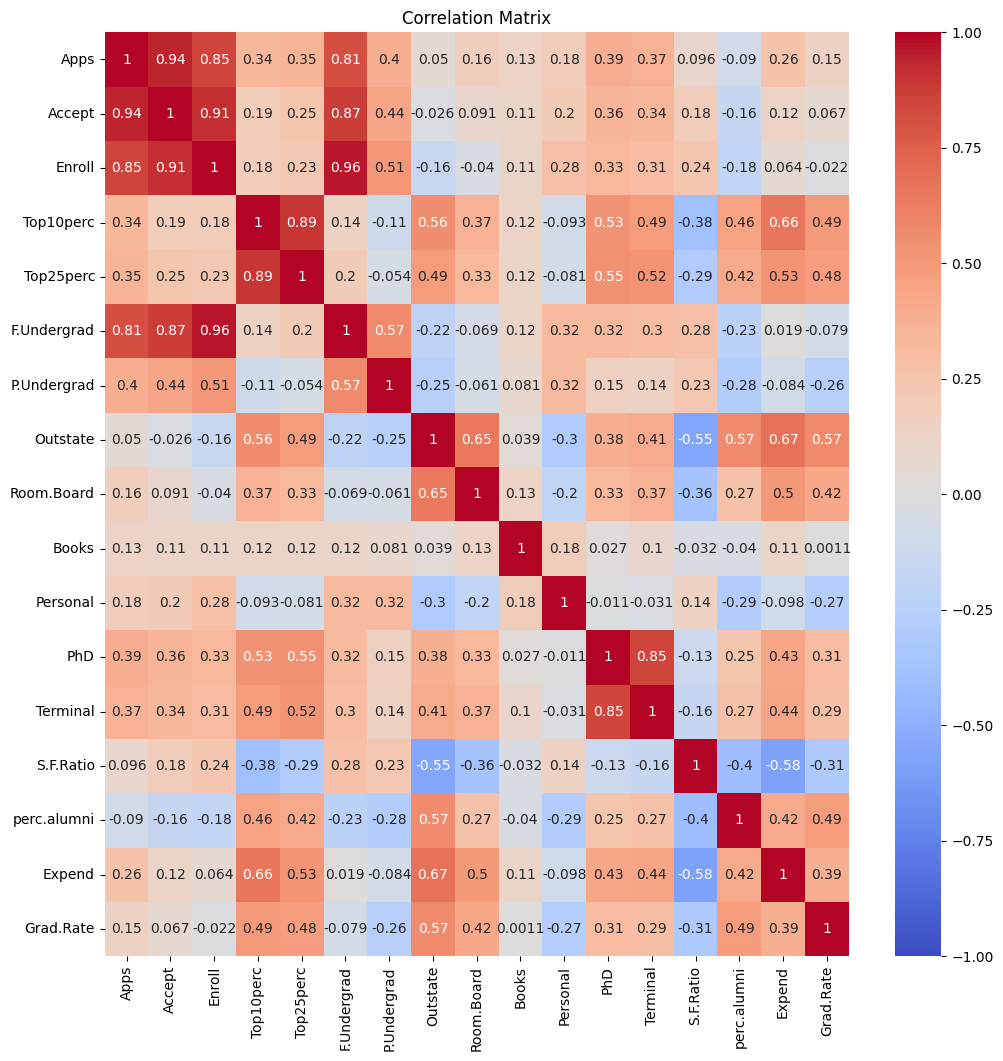

In [ ]:

numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns

plt.figure(figsize=(12, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

#Scatterplot with regression lines for all the data

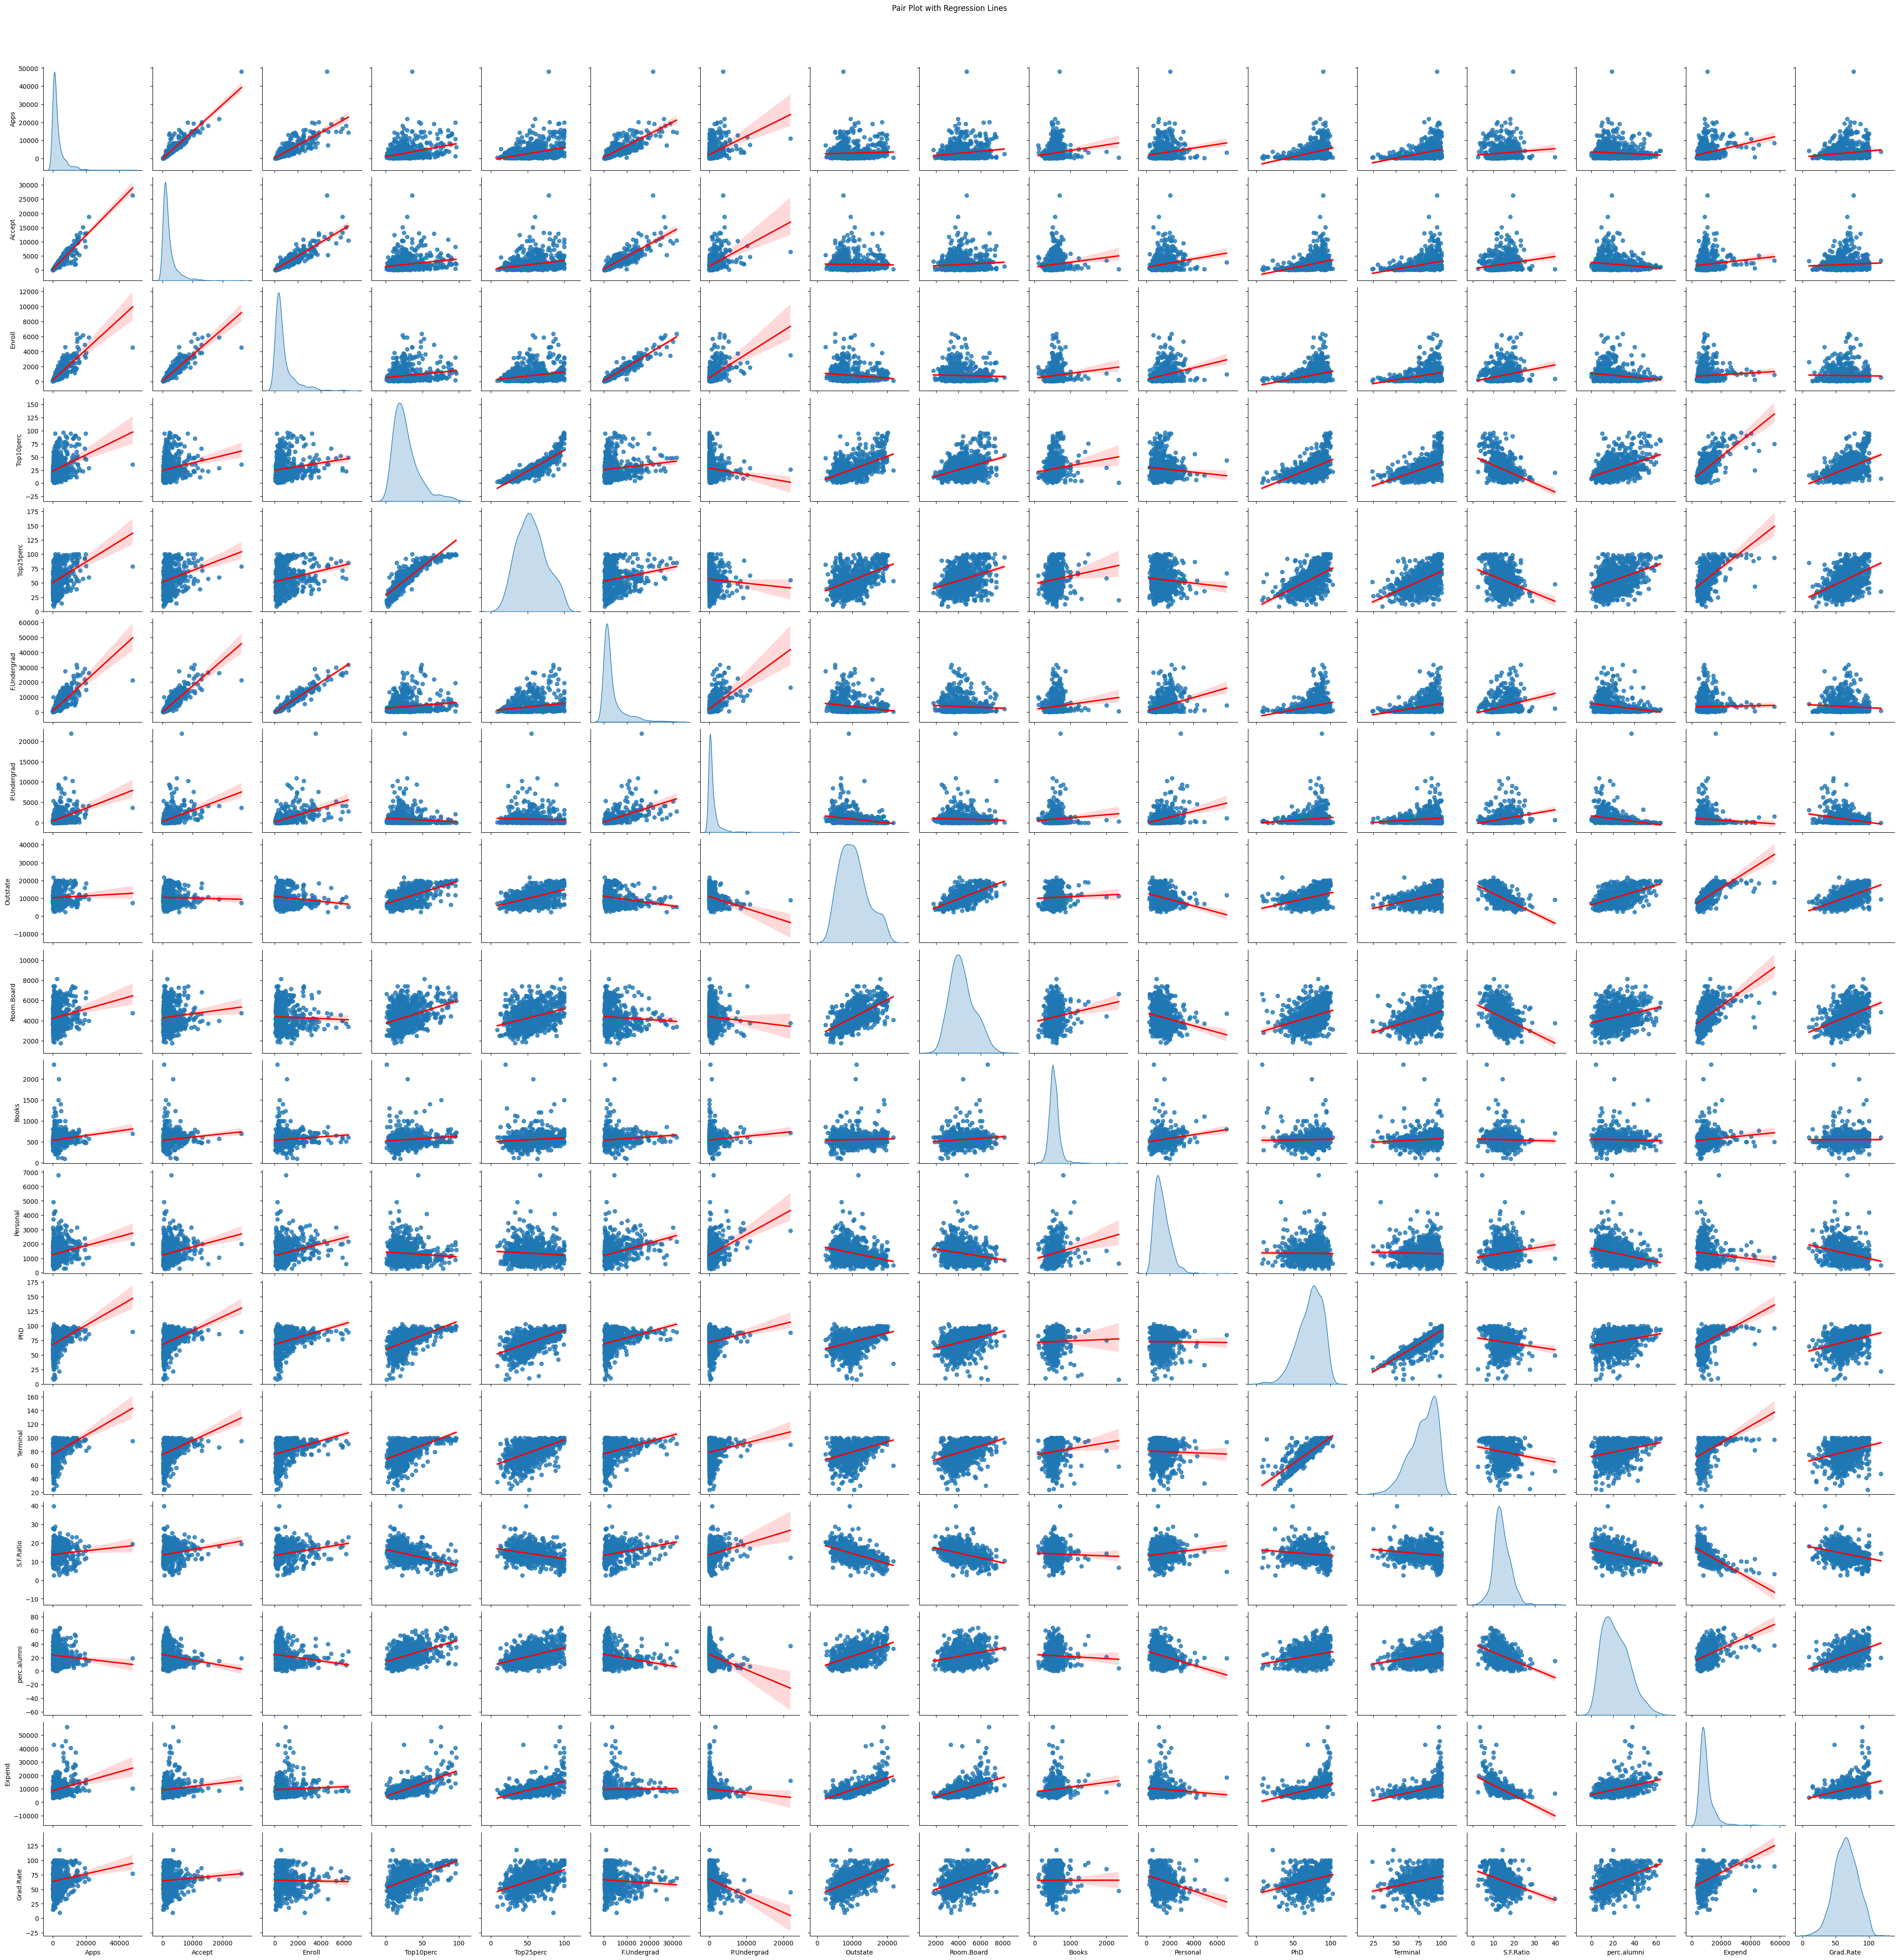

In [ ]:
#Pair plot with regression lines for all data in dataframe
import seaborn as sns
sns.pairplot(df, kind="reg", diag_kind="kde", plot_kws={'line_kws':{'color':'red'}})
plt.suptitle("Pair Plot with Regression Lines", y=1.02)
plt.show()

#Correlation Matrix Heatmap for just focused catagories

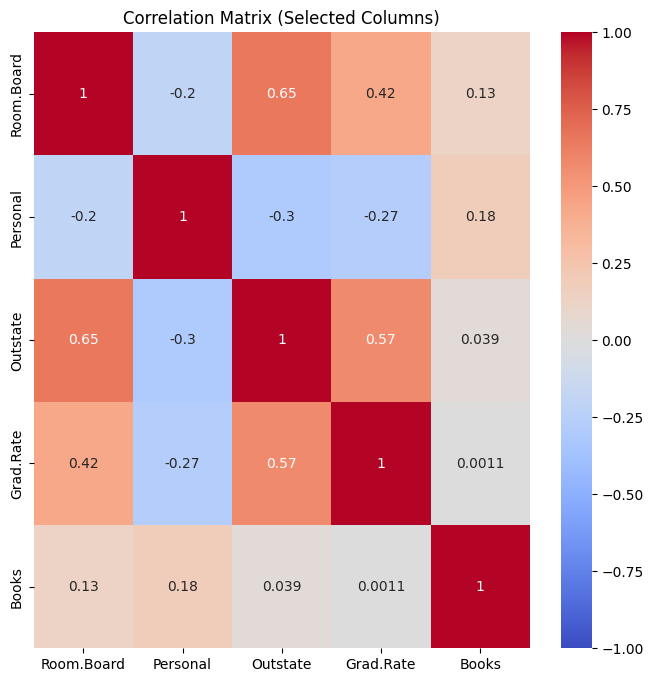

In [ ]:

numeric_df = df.select_dtypes(include=['number'])

corr_matrix = numeric_df.corr()

# Specify the columns and rows you want to include in the heatmap
# For example, you might want to focus on columns 'col1', 'col2', 'col3'
selected_columns = ['Room.Board', 'Personal', 'Outstate', 'Grad.Rate', 'Books']

# Subset the correlation matrix to only include the selected columns and rows
filtered_corr_matrix = corr_matrix.loc[selected_columns, selected_columns]

# Plot the heatmap
plt.figure(figsize=(8, 8))  # Adjust the size of the heatmap if needed
sns.heatmap(filtered_corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix (Selected Columns)")
plt.show()


# Splitting the Data into Public and Private

In [ ]:
# Load your dataset (assuming it's a CSV file)
df = pd.read_csv('College_Data (1).csv')  # replace with your actual file path

# Filter for private and public colleges
private_colleges = df[df['Private'] == 'Yes']
public_colleges = df[df['Private'] == 'No']

# You can now focus on specific columns for affordability metrics and graduation rates
# For example, these are the columns we're interested in:
columns_of_interest = ['Private', 'Room.Board', 'Books', 'Personal', 'Grad.Rate']

private_colleges_subset = private_colleges[columns_of_interest]
public_colleges_subset = public_colleges[columns_of_interest]

# Display the first few rows of each subset for verification
print("Private Colleges Data:")
print(private_colleges_subset.head())

print("\nPublic Colleges Data:")
print(public_colleges_subset.head())

Private Colleges Data:
  Private  Room.Board  Books  Personal  Grad.Rate
0     Yes        3300    450      2200         60
1     Yes        6450    750      1500         56
2     Yes        3750    400      1165         54
3     Yes        5450    450       875         59
4     Yes        4120    800      1500         15

Public Colleges Data:
   Private  Room.Board  Books  Personal  Grad.Rate
19      No        3592    500      2000         34
21      No        2540     96      2000         70
23      No        4850    700      2100         48
25      No        2650    450      1000         48
27      No        3933    600      1908         69


#Heatmap for just public schools




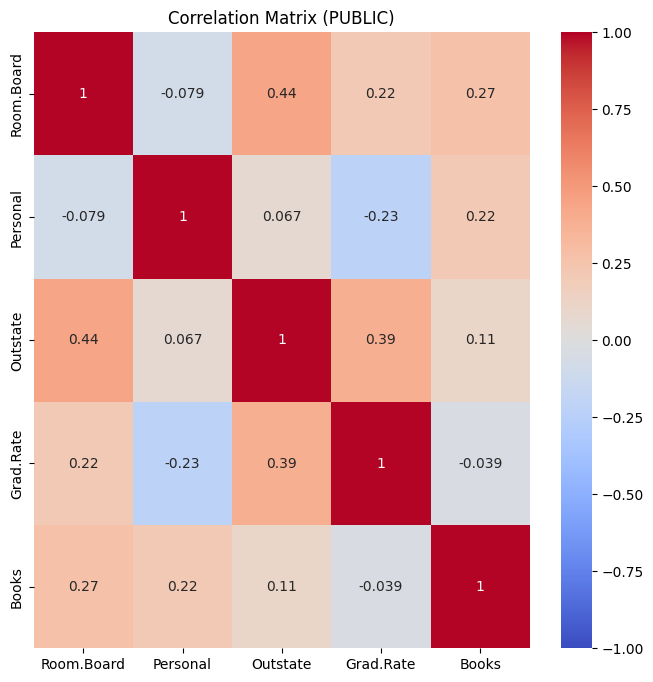

In [ ]:

numeric_public = public_colleges.select_dtypes(include=['number'])

corr_matrix_public = numeric_public.corr()

# Specify the columns and rows you want to include in the heatmap
# For example, you might want to focus on columns 'col1', 'col2', 'col3'
selected_columns = ['Room.Board', 'Personal', 'Outstate', 'Grad.Rate', 'Books']

# Subset the correlation matrix to only include the selected columns and rows
filtered_corr_matrix_public = corr_matrix_public.loc[selected_columns, selected_columns]

# Plot the heatmap
plt.figure(figsize=(8, 8))  # Adjust the size of the heatmap if needed
sns.heatmap(filtered_corr_matrix_public, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix (PUBLIC)")
plt.show()

# Heatmap for just Private Schools

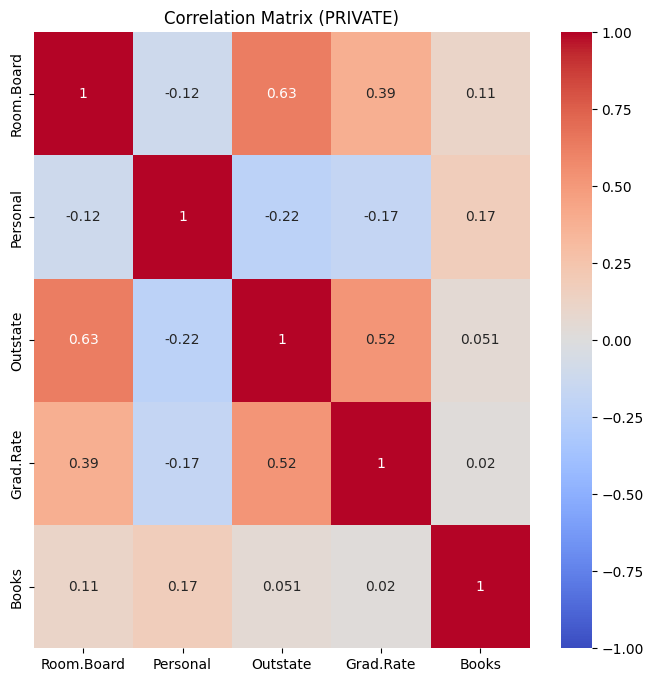

In [ ]:
numeric_private = private_colleges.select_dtypes(include=['number'])

corr_matrix_private = numeric_private.corr()

# Specify the columns and rows you want to include in the heatmap
# For example, you might want to focus on columns 'col1', 'col2', 'col3'
selected_columns = ['Room.Board', 'Personal', 'Outstate', 'Grad.Rate', 'Books']

# Subset the correlation matrix to only include the selected columns and rows
filtered_corr_matrix_private = corr_matrix_private.loc[selected_columns, selected_columns]

# Plot the heatmap
plt.figure(figsize=(8, 8))  # Adjust the size of the heatmap if needed
sns.heatmap(filtered_corr_matrix_private, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix (PRIVATE)")
plt.show()

#Box Plots for Affordability Metrics in Comparision to Private vs Public


<ipython-input-9-4549fa7ff06f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  private_colleges['Type'] = 'Private'
<ipython-input-9-4549fa7ff06f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  public_colleges['Type'] = 'Public'


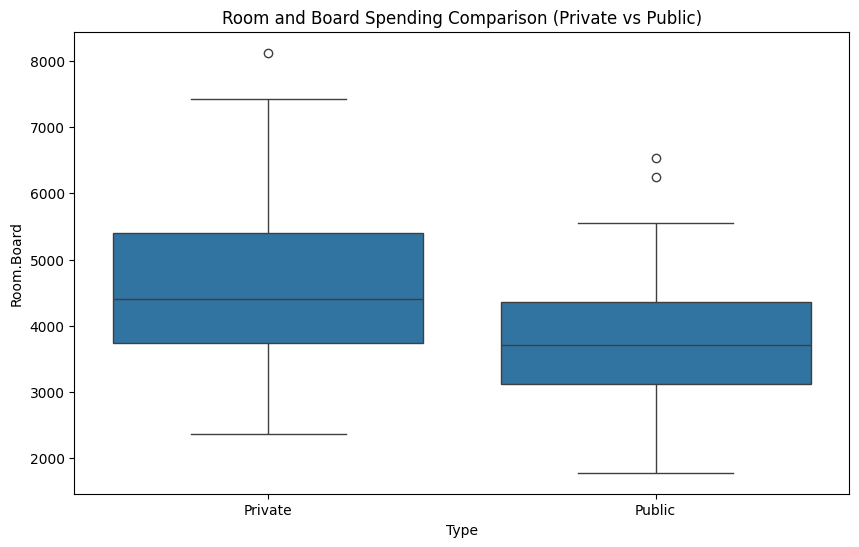

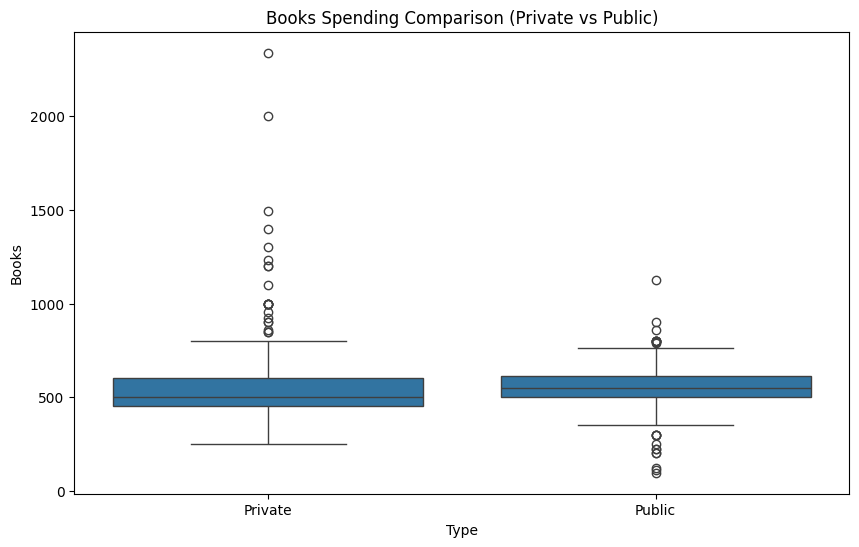

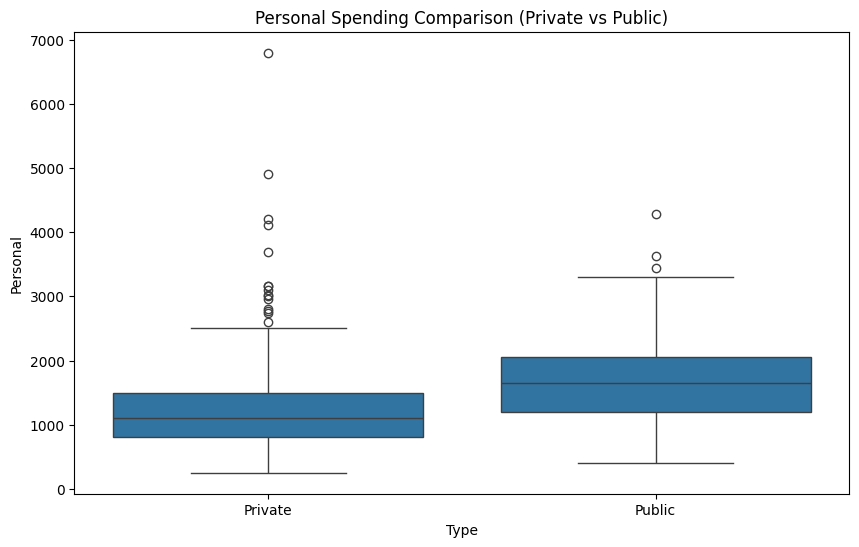

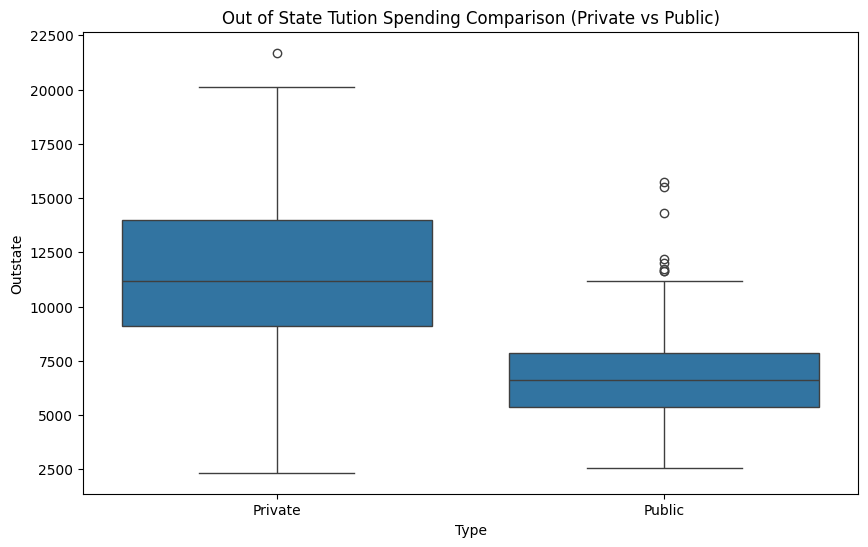

In [ ]:
# Combine private and public data into a single DataFrame for easy comparison
private_colleges['Type'] = 'Private'
public_colleges['Type'] = 'Public'

# Concatenate the dataframes
comparison_df = pd.concat([private_colleges, public_colleges])

# Box plot for 'Room.Board' between private and public colleges
plt.figure(figsize=(10, 6))
sns.boxplot(data=comparison_df, x='Type', y='Room.Board')
plt.title('Room and Board Spending Comparison (Private vs Public)')
plt.show()

# Box plot for 'Books' between private and public colleges
plt.figure(figsize=(10, 6))
sns.boxplot(data=comparison_df, x='Type', y='Books')
plt.title('Books Spending Comparison (Private vs Public)')
plt.show()

# Box plot for 'Personal' spending between private and public colleges
plt.figure(figsize=(10, 6))
sns.boxplot(data=comparison_df, x='Type', y='Personal')
plt.title('Personal Spending Comparison (Private vs Public)')
plt.show()

# Box plot for 'Out of state tution' spending between private and public colleges
plt.figure(figsize=(10, 6))
sns.boxplot(data=comparison_df, x='Type', y='Outstate')
plt.title('Out of State Tution Spending Comparison (Private vs Public)')
plt.show()


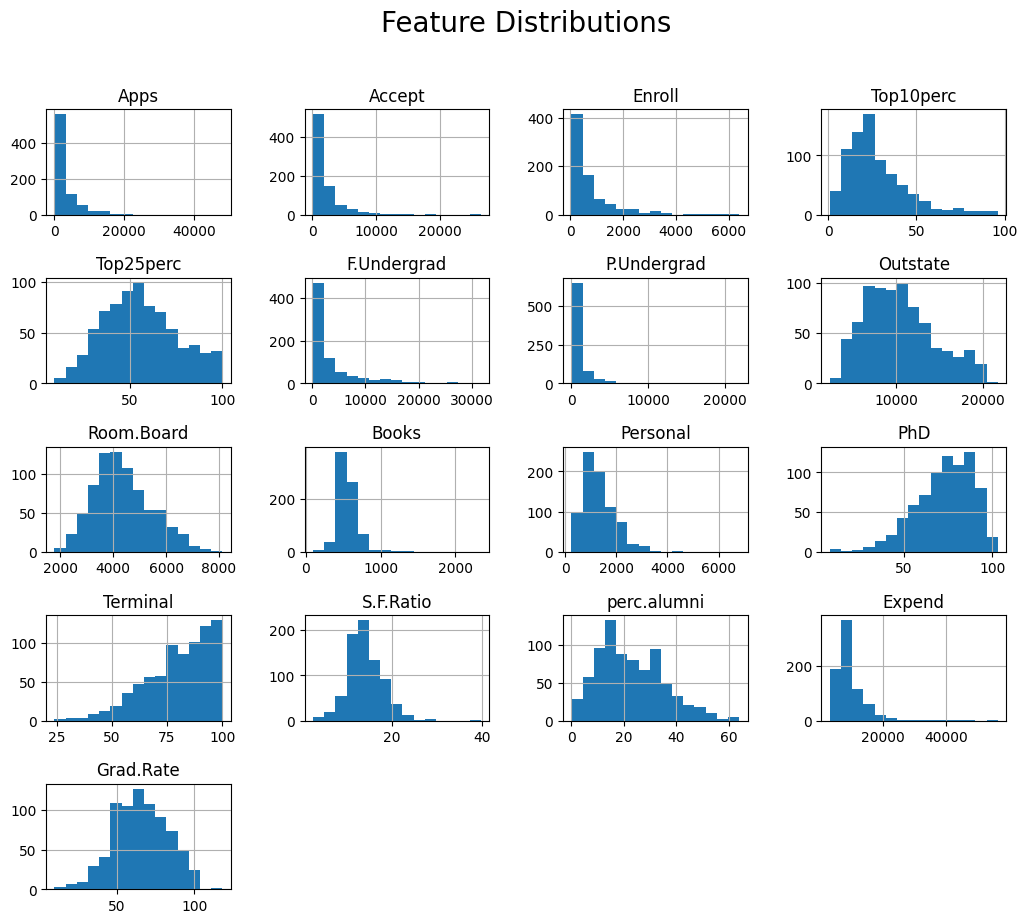

In [12]:
#Visualize feature distributions
df.hist(bins=15, figsize=(12,10))
plt.suptitle("Feature Distributions", fontsize=20)

# Adjusting margins to prevent text on top of each other (bottom of charts ran into the next charts title)
plt.subplots_adjust(left=0.1, right=0.9, top=0.88, bottom=0.1, hspace=0.6, wspace=0.4)

plt.show()

# Scatterplot with regression lines for target variables

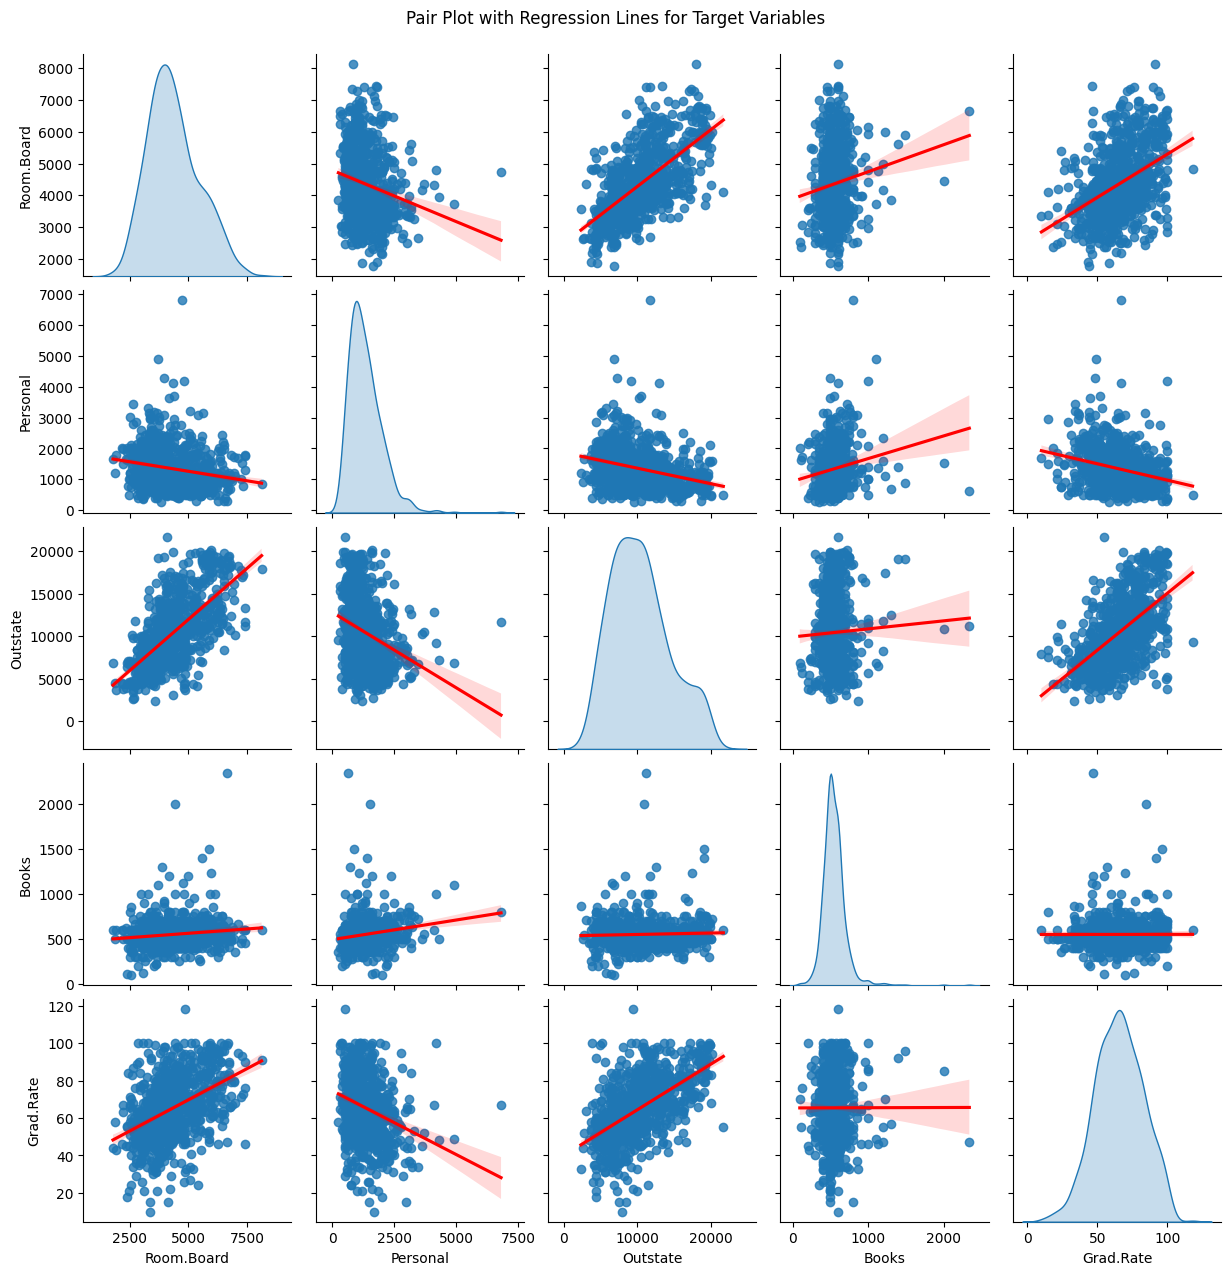

In [ ]:
#Pair plot with regression lines for only target variables in dataframe
#Note: this is using seaborn as sns (imported earlier)

selected_columns = ['Room.Board', 'Personal', 'Outstate', 'Books', 'Grad.Rate']  #Selecting the columns that contain our target variables
df_selected = df[selected_columns] #Variable to use for only our selected columns
sns.pairplot(df_selected, kind="reg", diag_kind="kde", plot_kws={'line_kws':{'color':'red'}})
plt.suptitle("Pair Plot with Regression Lines for Target Variables", y=1.02)
plt.show()

Creating a model

In [ ]:

X = df[['Room.Board', 'Personal', 'Outstate', 'Books']]
y = df['Grad.Rate']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Print out the coefficients (to see the impact of each variable)
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)


Coefficients:  [ 0.00138431 -0.0032862   0.00202123 -0.00232949]
Intercept:  43.7149107808681


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}") #Mean Squared Error: This gives you an idea of how much the predicted values deviate from the actual values. Lower values are better.
print(f"R-squared: {r2}") #R-squared: This metric tells you how well the model explains the variance in the graduation rate.
#A value closer to 1 indicates a better fit, while a value closer to 0 indicates a poor fit.



Mean Squared Error: 138.07556380440192
R-squared: 0.4129505749246579


# Explanition of outputs of model

These coefficients represent how much the graduation rate is expected to change when each of the affordability metrics changes by one unit, while holding all other variables constant. Here's how to interpret them:

Room and Board: For every 1-unit increase in room and board costs, the graduation rate increases by approximately 0.0014%.
Tuition: For every 1-unit increase in tuition, the graduation rate decreases by approximately 0.0033%. This suggests that as tuition increases, graduation rates tend to decrease, which might make sense, as higher costs could create barriers to completing college.
Personal Spending: For every 1-unit increase in personal spending, the graduation rate increases by approximately 0.002%. This could imply that higher personal spending (perhaps reflecting more disposable income or better financial comfort) is associated with higher graduation rates.
Books: For every 1-unit increase in book costs, the graduation rate decreases by approximately 0.0023%. Similar to tuition, this suggests that higher costs for books may correlate with a decrease in graduation rate.
These coefficients are quite small, which is typical when dealing with affordability metrics in the context of broader social factors. But the sign and magnitude of these coefficients can still provide useful insights into relationships between affordability and graduation outcomes.

2. Intercept:
The intercept value of
43.71
43.71 represents the baseline graduation rate when all the affordability metrics (room and board, tuition, personal spending, and books) are zero. While this doesn't have a direct real-world interpretation (since zero values for these metrics are unrealistic), it's part of the linear model that allows for a proper fit.
3. Mean Squared Error (MSE):
MSE = 138.08: This value represents the average squared difference between the actual and predicted graduation rates on your test set. In simpler terms, the model is off by an average of about 138 graduation rate units squared. While the MSE is not directly interpretable as a simple number, a high MSE typically indicates that the model may not be capturing the relationship well.
If the values for graduation rate are in the range of 40–60% (for example), this MSE could be relatively large. You can also compare it with other models or try reducing the error by improving the model.

4. R-squared (R²):
R² = 0.413: This means that 41.3% of the variance in graduation rates can be explained by the combination of room and board, tuition, personal spending, and books. While this is not a high R², it’s not uncommon for social science datasets to have a relatively low R² because graduation rates can be influenced by many factors beyond financial metrics (e.g., student support services, institutional quality, personal factors, etc.).
An R² of 0.41 indicates a moderate fit: the model is explaining some of the variation in graduation rates, but there is still a lot that is unexplained. This is not necessarily a bad result, but it does suggest that the model could be improved.

# Using predictors to assume graduatoin rate

In [ ]:
# Let's assume you have the following input values for the metrics
room_and_board_input = 10000  # Example: Room and board cost
tuition_input = 20000         # Example: Tuition cost
personal_spending_input = 3000 # Example: Personal spending
books_input = 500             # Example: Book costs

# **Get the feature names from the trained model**
feature_names = model.feature_names_in_

# **Create a DataFrame with these new values (one row, as a single prediction)**
# **Ensure column names and order match those used during model training**
new_data = pd.DataFrame([[room_and_board_input, tuition_input, personal_spending_input, books_input]],
                       columns=feature_names)

# Check the new input data
print(new_data)

# Predict the graduation rate using the public schools model
graduation_rate_prediction_public = model.predict(new_data)

# Output the prediction
print(f"Predicted Graduation Rate (Public School): {graduation_rate_prediction_public[0]:.2f}%")

   Room.Board  Personal  Outstate  Books
0       10000     20000      3000    500
Predicted Graduation Rate (Public School): -3.27%
